#***Set parameters***

In [0]:
__algo__ = "KMEANS" #Name of the algorithm
recnum = 3000 #Number of records to be read from files
k = 50 #Number of Clusters


usesqrt = False #Set value of k to sqrt of recnum
randomsample = False #Sampling to be True/False for reacords which are read

#Bash Code
Git all the Required Files

In [59]:
!git clone https://github.com/DevashishX/AbstractClustering.git; 

fatal: destination path 'AbstractClustering' already exists and is not an empty directory.


In [0]:
!cp -r AbstractClustering/* ./.

In [3]:
!ls -alFh

total 84M
drwxr-xr-x 1 root root 4.0K Feb 27 13:14 ./
drwxr-xr-x 1 root root 4.0K Feb 27 12:02 ../
drwxr-xr-x 9 root root 4.0K Feb 27 12:04 AbstractClustering/
-rw-r--r-- 1 root root  39M Feb 27 14:52 cleaned.7z
-rw-r--r-- 1 root root  90K Feb 27 14:52 ClusterKEuclid.ipynb
drwxr-xr-x 1 root root 4.0K Feb 19 17:12 .config/
-rw-r--r-- 1 root root 3.7K Feb 27 14:52 convert_repository_json.py
drwxr-xr-x 2 root root 4.0K Feb 27 12:04 CORE_files/
-rw-r--r-- 1 root root  33K Feb 27 14:52 CORE.html
-rw-r--r-- 1 root root  48K Feb 27 14:52 CreateSentenceEmbedding.ipynb
drwxr-xr-x 2 root root 4.0K Feb 27 12:04 dataset/
-rw-r--r-- 1 root root  95K Feb 27 14:52 Devashish_word2vec_cluster.ipynb
-rw-r--r-- 1 root root 978K Feb 27 13:14 downloaded_Mega_Sample_centroid.pkl
drwx------ 4 root root 4.0K Feb 27 13:04 drive/
-rw-r--r-- 1 root root  27K Feb 27 14:52 example_tags.txt
-rw-r--r-- 1 root root  37K Feb 27 14:52 h_cluster.ipynb
drwxr-xr-x 2 root root 4.0K Feb 27 12:17 .ipynb_checkpoints/
-rw-r--r

#Actual Code

#imports and time

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import os, subprocess
import datetime, time

In [135]:
start_time = time.time()
start_datetime = datetime.datetime.now()
print("start_time: ", start_time)
print("start_datetime: ", start_datetime)
# print(datetime.datetime.now()-start_datetime)

start_time:  1582829692.078808
start_datetime:  2020-02-27 18:54:52.078847


#File Settings

In [136]:
embedDir = "./MegaSentEmbs/"
dumpdir = "./dump/"
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = int(len(filelist))
# filenum = 5
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  116


#Number of Records
It is Recommended to Set this at the top parameters

In [0]:
recnum = recnum

#Read all the pandas dataframes

In [138]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)
print("megadf.head:\n", megadf.head())

randomsample:  False
megadf.shape:  (3000, 4)
megadf.head:
        id  ...                                          embedding
0  395086  ...  [0.1048434150393569, -0.022277361643991286, -0...
1  395088  ...  [0.52842, -0.1687455, 0.40093833333333334, -0....
2  395097  ...  [0.1048434150393569, -0.022277361643991286, -0...
3  395102  ...  [0.07919400708734191, 0.42536576316588975, -0....
4  395105  ...  [0.16442311594651932, 0.30571671712325205, -0....

[5 rows x 4 columns]
CPU times: user 143 ms, sys: 18.9 ms, total: 162 ms
Wall time: 165 ms


In [139]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(3000, 250)


#Number of Clusters
It is Recommended to Set this at the top parameters

In [140]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  50


#Clustering

In [141]:
%%time
print("Starting Clustering Process")
kmeans = cluster.KMeans(n_clusters=k, verbose=1, n_jobs=-1)
kmeans.fit(data)
print("done")
print("k_means.fit(data) Done!")

Starting Clustering Process
done
k_means.fit(data) Done!
CPU times: user 53.3 ms, sys: 85.5 ms, total: 139 ms
Wall time: 7.75 s


###Saving the output data into vars

In [0]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
megadf["clusterlabel"]=labels
# megadf["centroids"] = centroids
# centroidDF = pd.DataFrame(centroids)


#Plotting

Text(0.5, 1.0, 'KMEANS with k=50 records=3000 features=250')

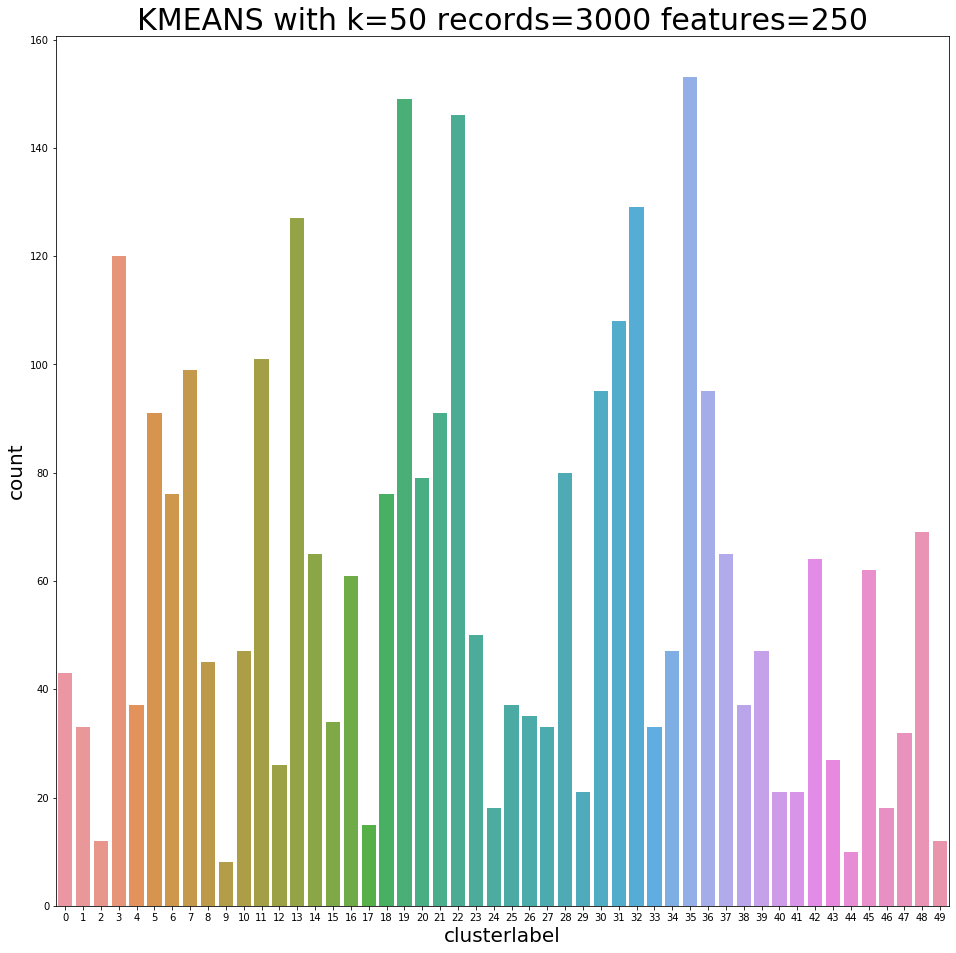

In [143]:
plt.figure(figsize=(16,16))
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        "{} with k={} records={} features={}".format(__algo__, k, data.shape[0], data.shape[1]),
        fontdict = {'fontsize' : 30}
    )

#Saving Data

In [0]:
snspltname = "{}_K{}_R{}_F{}_plt.png".format(__algo__, k, data.shape[0], data.shape[1])
snsplot.figure.savefig(snspltname)
os.environ["SAVE_DF"] = snspltname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [0]:
clusterdfname = "{}_K{}_R{}_F{}.pkl".format(__algo__, k, data.shape[0], data.shape[1])
megadf.to_pickle(clusterdfname)
os.environ["SAVE_DF"] = clusterdfname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [0]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_K{}_R{}_F{}_Centroids.pkl".format(__algo__, k, data.shape[0], data.shape[1])
centroidDF.to_pickle(centroidDFname)
os.environ["SAVE_DF"] = centroidDFname
!cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

###local machine dtale code
commented out

In [0]:
# # import dtale
# s = megadf[megadf["clusterlabel"] == 48].loc[:, ["title", "abstract"]]
# # megadf.columns
# # dtale.show(s)
# s

###Sampling the clusters
commented out

In [0]:
# sample = pd.DataFrame()
# for n in range(k):
#     temp = megadf[megadf["clusterlabel"] == n].loc[:, :]
#     sample = sample.append(temp.head(50), ignore_index=True)
#     print("Cluster Number: ", n)
    # print(temp.head(100).loc[:, ["id", "title", "abstract", "clusterlabel"]])
    

#Total Time to Exec

In [148]:
end_time = time.time()
end_datetime = datetime.datetime.now()
# print("end_time:",  end_time)
print("end_datetime: ", end_datetime)
print("done! {}".format(round(end_time-start_time, 2)))
print("Time taken: ", str(end_datetime-start_datetime))

end_datetime:  2020-02-27 18:55:10.713255
done! 18.63
Time taken:  0:00:18.634408


#Open dataframe in colab

In [149]:
sub = megadf.loc[:, ["title", "abstract", "clusterlabel"]]
sub.tail()

,title,abstract,clusterlabel
2995,Defining the clinical role of the mammalian ta...,"[lung, cancer, biggest, cancer, killer, patien...",21
2996,Bio-functionalised nanoparticles for enzyme se...,"[inorganic, nanoparticles, accompanying, diver...",21
2997,Lithological mapping on the Antarctic Peninsul...,"[antarctic, peninsula, larger, uk, limited, ge...",28
2998,"WWOX, tumour suppressor and modifier gene, as ...","[wwox, tumour, suppressor, gene, demonstrated,...",21
2999,Improving efficiency in drive lines : an exper...,"[research, concern, improvement, power, effici...",35
